### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
df=pd.read_csv("C:/Somduity/Python/vehicle.csv")
df=df.dropna()
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [2]:
df.dtypes
df["class"].value_counts()

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [3]:
df.isnull().sum()


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [4]:
from scipy.stats import zscore


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [5]:
dummy=pd.get_dummies(df["class"])
df=pd.concat((df,dummy),axis=1)
df.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,bus,car,van
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,184.0,70.0,6.0,16.0,187.0,197,van,0,0,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,158.0,72.0,9.0,14.0,189.0,199,van,0,0,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,220.0,73.0,14.0,9.0,188.0,196,car,0,1,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,127.0,63.0,6.0,10.0,199.0,207,van,0,0,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,188.0,127.0,9.0,11.0,180.0,183,bus,1,0,0


In [6]:
import numpy as np
df=df.drop(columns="class",axis=1)



In [7]:
df_z=df.apply(zscore)

In [8]:
import seaborn as sns
sns.pairplot(df,diag_kind="kde")

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [9]:
distortion=[]
from sklearn.cluster import KMeans

You can later use this array to plot the elbow plot

In [10]:
from sklearn import metrics


### 5. Calculating distortion - C distance

In [11]:
cluster_range = range( 3, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

cluster_sil_scores = []
mse=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ ) # capture the intertia
  
  cluster_sil_scores.append(metrics.silhouette_score(df_z, labels, metric='euclidean'))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,distortion,Avg Sil Score
0,3,9184.732797,0.254761
1,4,8209.838019,0.263349
2,5,6901.600755,0.276051
3,6,6253.424869,0.285195
4,7,5677.867692,0.300203
5,8,5057.699704,0.307433
6,9,4764.885113,0.263355
7,10,4394.837894,0.315897
8,11,4166.003533,0.264721
9,12,3925.949866,0.262495


### 6. Plotting Elbow/ Scree Plot

<Figure size 864x432 with 0 Axes>

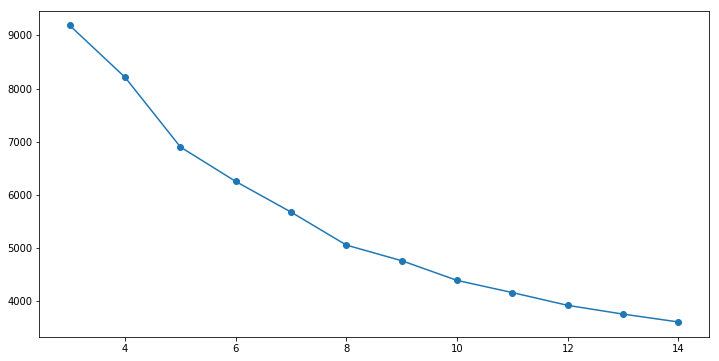

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [14]:
5

5

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [15]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [16]:
centroids = cluster.cluster_centers_
centroids

array([[-3.47327186e-01, -3.80893696e-01, -4.31052611e-01,
        -6.61786919e-01, -1.61532068e-01,  7.01310340e-02,
        -7.69325047e-01,  8.02065670e-01, -7.26940695e-01,
        -9.39084528e-02, -7.94808513e-01, -7.60086199e-01,
        -5.01273185e-01, -3.03237560e-01, -8.58511091e-04,
        -3.49091576e-01,  2.07647078e-01,  3.10376236e-01,
        -5.80664320e-01, -1.00392339e+00,  1.76595312e+00],
       [ 1.19443755e+00,  1.23168601e+00,  1.26207460e+00,
         9.78750545e-01,  7.45958541e-02,  2.43795641e-01,
         1.34781198e+00, -1.24362058e+00,  1.35927648e+00,
         1.15045682e+00,  1.24401196e+00,  1.36164718e+00,
         1.14189517e+00, -9.29357618e-02,  1.75661937e-01,
         2.80127404e-01, -4.72029361e-02,  1.80254544e-01,
        -2.17562539e-01,  6.68742642e-01, -5.61724114e-01],
       [-1.09832600e+00, -6.50130835e-01, -1.02950910e+00,
        -1.08271572e+00, -4.85705280e-01, -4.37169581e-01,
        -8.14966833e-01,  9.01054289e-01, -7.95301571e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [17]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
0,-0.347327,-0.380894,-0.431053,-0.661787,-0.161532,0.070131,-0.769325,0.802066,-0.726941,-0.093908,...,-0.760086,-0.501273,-0.303238,-0.000859,-0.349092,0.207647,0.310376,-0.580664,-1.003923,1.765953
1,1.194438,1.231686,1.262075,0.978751,0.074596,0.243796,1.347812,-1.243621,1.359276,1.150457,...,1.361647,1.141895,-0.092936,0.175662,0.280127,-0.047203,0.180255,-0.217563,0.668743,-0.561724
2,-1.098326,-0.650131,-1.029509,-1.082716,-0.485705,-0.437170,-0.814967,0.901054,-0.795302,-0.724732,...,-0.809929,-0.451555,0.884818,-0.073675,-0.234232,-1.123646,-1.245685,0.515921,-0.243535,-0.239550
3,-0.082701,-0.531170,-0.173994,0.254531,0.216203,-0.271113,-0.191207,-0.027751,-0.254010,-0.602616,...,-0.216690,-0.518226,-0.638992,-0.123557,0.169951,0.925853,0.685880,0.237877,0.273144,-0.561724
4,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,...,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,-0.004957,-1.016120,1.194744


Hint: Use pd.Dataframe function 

In [20]:
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction


In [21]:
df_z.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
GROUP,,,,,,,,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
2,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
3,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
4,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


### Use kmeans.labels_ function to print out the labels of the classes

In [22]:
cluster.labels_

array([0, 0, 1, 0, 4, 3, 0, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 2, 3, 3, 1,
       0, 2, 1, 3, 2, 0, 3, 3, 1, 3, 2, 4, 1, 2, 1, 2, 0, 3, 1, 0, 0, 2,
       0, 3, 2, 3, 1, 3, 1, 0, 3, 0, 1, 2, 1, 2, 2, 2, 3, 2, 1, 0, 1, 1,
       3, 2, 0, 1, 3, 2, 2, 1, 0, 2, 3, 1, 0, 0, 3, 2, 1, 3, 1, 0, 2, 1,
       2, 2, 1, 2, 4, 0, 0, 0, 3, 1, 2, 2, 3, 0, 0, 2, 2, 0, 0, 1, 1, 3,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 3, 3, 0, 1, 4, 0, 0, 2, 0, 3, 1,
       2, 3, 1, 0, 3, 3, 0, 1, 3, 3, 1, 0, 1, 3, 0, 3, 2, 1, 3, 2, 1, 1,
       3, 1, 2, 0, 1, 1, 0, 1, 0, 3, 3, 3, 0, 1, 2, 3, 2, 1, 3, 3, 3, 1,
       3, 3, 0, 1, 3, 2, 1, 2, 2, 2, 0, 3, 1, 1, 0, 0, 3, 2, 1, 3, 0, 3,
       1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 3,
       1, 2, 3, 3, 2, 1, 0, 0, 3, 3, 1, 2, 1, 0, 3, 0, 1, 3, 3, 1, 1, 2,
       3, 0, 0, 1, 2, 3, 0, 2, 2, 3, 0, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 0,
       2, 1, 2, 0, 4, 2, 0, 1, 3, 1, 2, 3, 3, 1, 3, 3, 0, 2, 2, 1, 1, 1,
       1, 0, 2, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1, 3, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [32]:
a1= np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [33]:

b1 = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

In [34]:

c1 = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [85]:
s1=pd.DataFrame(a1,columns=('x','y'))
s1.shape
s2=pd.DataFrame(b1,columns=('x','y'))
s2.shape
s3=pd.DataFrame(c1,columns=('x','y'))
s3.shape
df=pd.concat([s1,s2,s3])
df.head(10)

(100, 2)

(50, 2)

(100, 2)

,x,y
0,12.155385,2.743778
1,10.735008,1.691097
2,7.856302,1.927084
3,10.383572,1.334559
4,9.912606,-1.934018
5,14.138506,0.725927
6,9.941288,0.765438
7,9.726286,-0.049041
8,8.344225,-2.314211
9,10.666450,-2.780843


### 10. Use scatter matrix to print all the 3 distributions

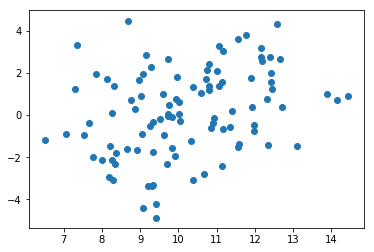

In [89]:
plt.scatter(data=s1,x='x',y='y')


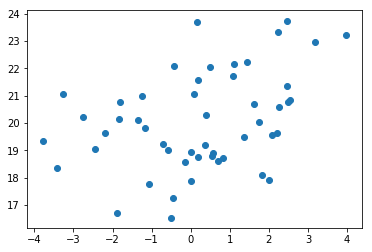

In [90]:
plt.scatter(data=s2,x='x',y='y')


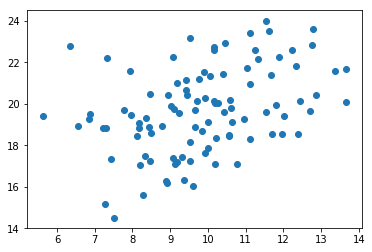

In [91]:
plt.scatter(data=s3,x='x',y='y')

### 11. Find out the linkage matrix

In [63]:
from sklearn.cluster import AgglomerativeClustering 

In [101]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [102]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x000001CAA5303B70>)

Use ward as linkage metric and distance as Eucledian

In [95]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

In [97]:
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.9542510283351104

In [98]:
Z.shape

Z[1]
Z[1:10]

(249, 4)

array([1.63000000e+02, 2.47000000e+02, 7.29175433e-02, 2.00000000e+00])

array([[1.63000000e+02, 2.47000000e+02, 7.29175433e-02, 2.00000000e+00],
       [4.10000000e+01, 8.20000000e+01, 7.62551116e-02, 2.00000000e+00],
       [1.77000000e+02, 2.13000000e+02, 7.82492364e-02, 2.00000000e+00],
       [7.00000000e+00, 5.90000000e+01, 8.00249984e-02, 2.00000000e+00],
       [1.00000000e+02, 1.08000000e+02, 8.08416259e-02, 2.00000000e+00],
       [1.94000000e+02, 2.02000000e+02, 9.37720611e-02, 2.00000000e+00],
       [1.27000000e+02, 1.29000000e+02, 9.89075695e-02, 2.00000000e+00],
       [2.19000000e+02, 2.33000000e+02, 1.06413107e-01, 2.00000000e+00],
       [3.30000000e+01, 9.10000000e+01, 1.17374696e-01, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5,0,'sample index')

Text(0,0.5,'Distance')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [31.875, 31.875, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [112.5, 112.5, 143.75, 143.75],
  [55.9375, 55.9375, 128.125, 128.125],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [190.0, 190.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [210.0, 210.0, 271.25, 271.25],
  [92.03125, 92.03125, 240.625, 240.625],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0

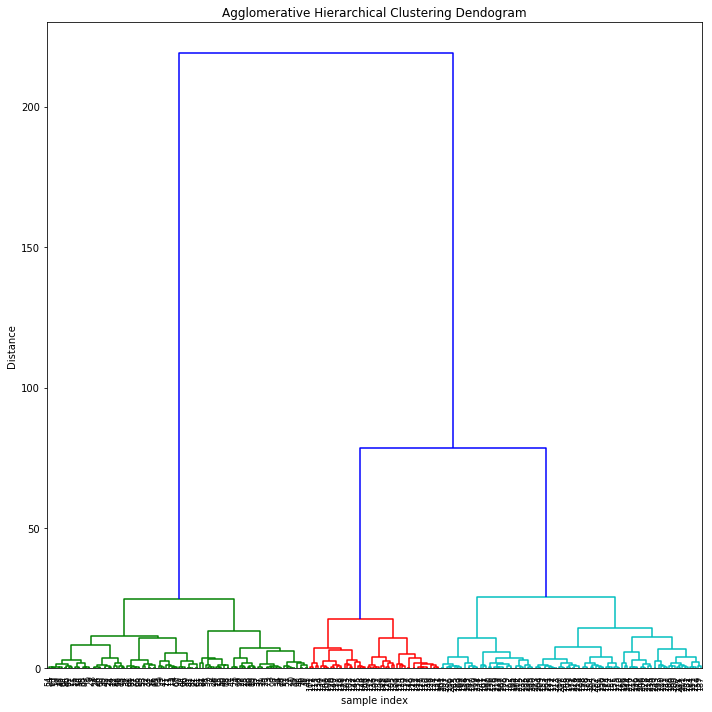

In [99]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5,0,'sample index')

Text(0,0.5,'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [60.0, 60.0, 90.0, 90.0],
  [21.25, 21.25, 75.0, 75.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [122.5, 122.5, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [232.5, 232.5, 271.25, 271.25],
  [200.0, 200.0, 251.875, 251.875],
  [141.25, 141.25, 225.9375, 225.9375],
  [48.125, 48.125, 183.59375, 183.59375]],
 'dcoord': [[0.0, 8.349252119029247, 8.349252119029247, 0.0],
  [0.0, 5.4

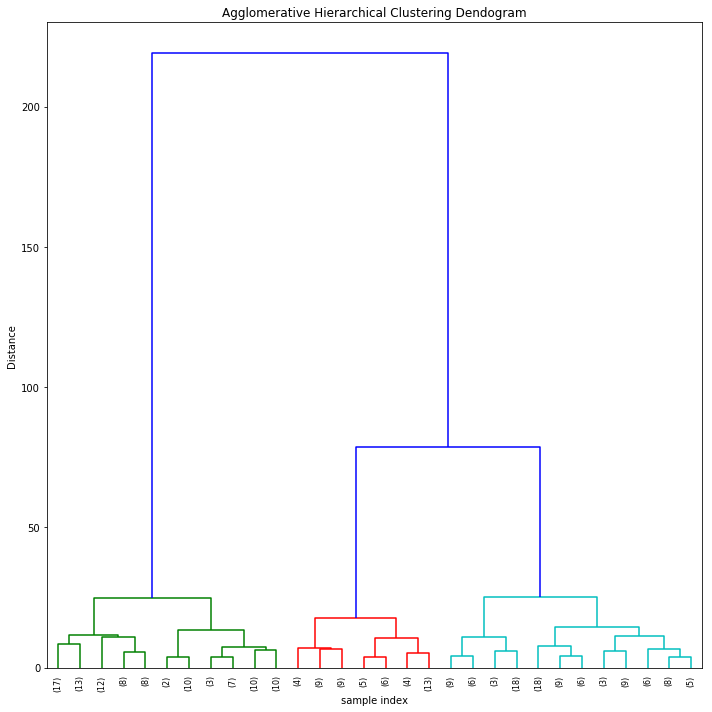

In [100]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8.,truncate_mode='lastp' )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 